<a href="https://colab.research.google.com/github/soyoonjeong/Dacon/blob/main/%EC%98%81%ED%99%94_%EA%B4%80%EA%B0%9D%EC%88%98_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8_%EA%B0%9C%EB%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

title : 영화의 제목<br>
distributor : 배급사<br>
genre : 장르<br>
release_time : 개봉일<br>
time : 상영시간(분)<br>
screening_rat : 상영등급<br>
director : 감독이름<br>
dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)<br>
dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)<br>
num_staff : 스텝수<br>
num_actor : 주연배우수<br>
box_off_num : 관객수

# 1. EDA

In [2]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("/content/drive/MyDrive/datasets/영화 관객수/movies_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/datasets/영화 관객수/movies_test.csv")

In [3]:
train_data.head()

title   distributor genre  ... num_staff  num_actor box_off_num
0     개들의 전쟁      롯데엔터테인먼트    액션  ...        91          2       23398
1       내부자들        (주)쇼박스   느와르  ...       387          3     7072501
2  은밀하게 위대하게        (주)쇼박스    액션  ...       343          4     6959083
3   나는 공무원이다        (주)NEW   코미디  ...        20          6      217866
4       불량남녀  쇼박스(주)미디어플렉스   코미디  ...       251          2      483387

[5 rows x 12 columns]

In [4]:
train_data.tail()

title distributor genre  ... num_staff  num_actor box_off_num
595      해무      (주)NEW   드라마  ...       510          7     1475091
596    파파로티      (주)쇼박스   드라마  ...       286          6     1716438
597   살인의 강   (주)마운틴픽쳐스    공포  ...       123          4        2475
598  악의 연대기   CJ 엔터테인먼트   느와르  ...       431          4     2192525
599     베를린   CJ 엔터테인먼트    액션  ...       363          5     7166532

[5 rows x 12 columns]

In [7]:
print(train_data.shape)
print(test_data.shape)

(600, 12)
(243, 11)


ㄴ> 아 test_data는 관객수가 빠졌구낭~

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


ㄴ> dir_prev_bfnum에 null 값이 있다! 나중에 채워줘야지!

In [12]:
pd.options.display.float_format = '{:.1f}'.format # e+ 이런식으로 나타나게 해주지 않는 코드

In [13]:
train_data.describe()

time  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num
count 600.0           270.0         600.0      600.0      600.0        600.0
mean  100.9       1050442.9           0.9      151.1        3.7     708181.8
std    18.1       1791408.3           1.2      165.7        2.4    1828005.9
min    45.0             1.0           0.0        0.0        0.0          1.0
25%    89.0         20380.0           0.0       17.0        2.0       1297.2
50%   100.0        478423.6           0.0       82.5        3.0      12591.0
75%   114.0       1286568.6           2.0      264.0        4.0     479886.8
max   180.0      17615314.0           5.0      869.0       25.0   14262766.0

### 장르에 따른 관객수

In [20]:
train_data['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [23]:
genre_data = train_data[['genre','box_off_num']].groupby('genre').mean()
genre_data

box_off_num
genre              
SF        1788345.7
공포         590832.5
느와르       2263695.1
다큐멘터리       67172.3
드라마        625689.8
멜로/로맨스     425968.0
뮤지컬          6627.0
미스터리       527548.2
서스펜스        82611.0
애니메이션      181926.7
액션        2203974.1
코미디       1193914.0

In [26]:
genre_data['영화 편수'] = train_data['genre'].value_counts(sort=False)
genre_data['비율'] = genre_data['box_off_num']/genre_data['영화 편수']
genre_data.sort_values(by='비율')

box_off_num  영화 편수       비율
genre                              
다큐멘터리       67172.3     93    722.3
뮤지컬          6627.0      5   1325.4
드라마        625689.8    221   2831.2
멜로/로맨스     425968.0     78   5461.1
애니메이션      181926.7     21   8663.2
공포         590832.5     42  14067.4
코미디       1193914.0     53  22526.7
미스터리       527548.2     17  31032.2
서스펜스        82611.0      2  41305.5
액션        2203974.1     28  78713.4
느와르       2263695.1     27  83840.6
SF        1788345.7     13 137565.1

SF가 가장 선호도가 높으며 다큐멘터리가 가장 선호도가 낮다. 

In [28]:
pd.reset_option('display.float_format')

In [29]:
train_data.corr()

time  dir_prev_bfnum  ...  num_actor  box_off_num
time            1.000000        0.264675  ...   0.114153     0.441452
dir_prev_bfnum  0.264675        1.000000  ...   0.083818     0.283184
dir_prev_num    0.306727        0.131822  ...   0.014006     0.259674
num_staff       0.623205        0.323521  ...   0.077871     0.544265
num_actor       0.114153        0.083818  ...   1.000000     0.111179
box_off_num     0.441452        0.283184  ...   0.111179     1.000000

[6 rows x 6 columns]

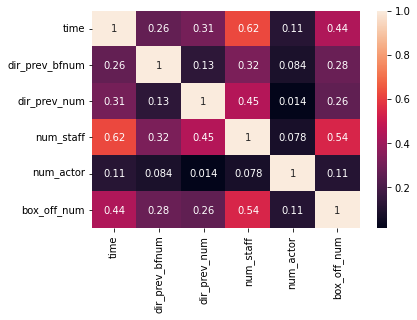

In [32]:
import seaborn as sns
sns.heatmap(train_data.corr(), annot=True)

스태프의 수와 관객수가 높은 상관관계를 보이고 있다! <br>
영화 상영시간과 관객수도 비교적 높은 상관관계를 보이고 있다 <br>